In [1]:
!pip install google-auth google-auth-oauthlib google-auth-httplib2 google-api-python-client deepface opencv-python numpy pandas requests pillow

In [5]:
!pip install tf-keras


In [2]:
pip install wordcloud textblob


Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shashikant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


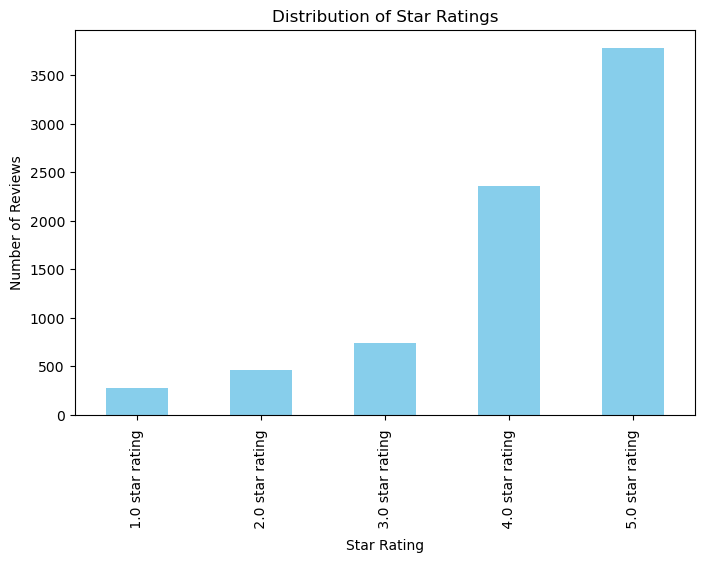

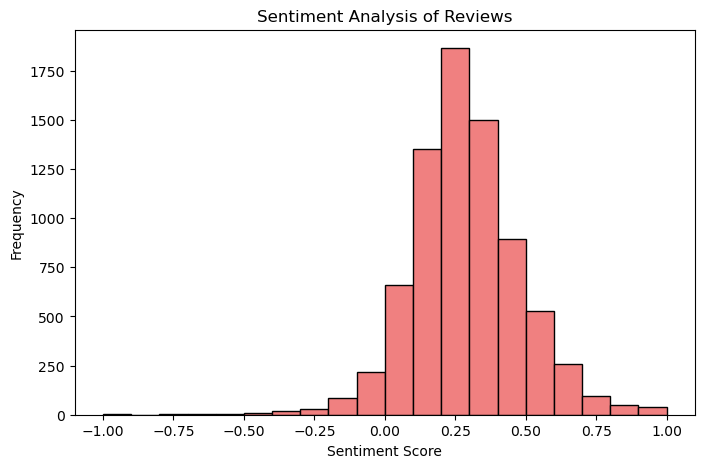

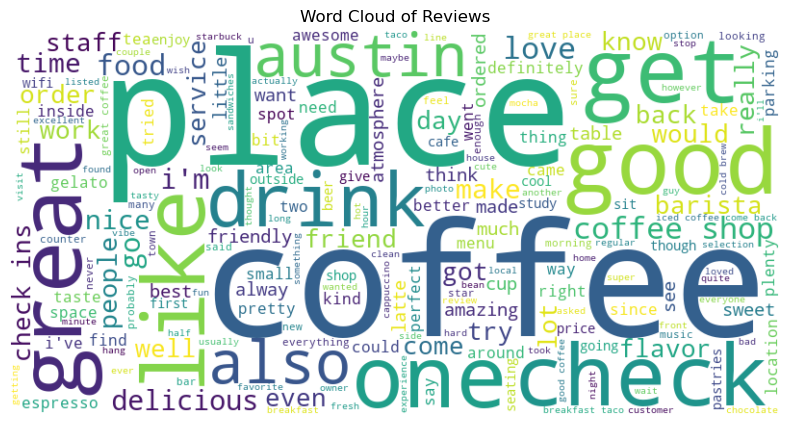


Most common impactful words in  1.0 star rating -star reviews:
[('coffee', 314), ('place', 200), ('like', 166), ('2016', 155), ('service', 129), ('food', 103), ('time', 103), ('good', 102), ('back', 98), ('order', 98)]

Most common impactful words in  2.0 star rating -star reviews:
[('coffee', 666), ('place', 356), ('like', 296), ('2016', 261), ('good', 260), ('back', 158), ('time', 158), ('service', 155), ('would', 153), ('really', 150)]

Most common impactful words in  3.0 star rating -star reviews:
[('coffee', 1195), ('place', 562), ('good', 521), ('like', 425), ('2016', 364), ('check', 333), ('really', 303), ('great', 262), ('food', 252), ('would', 248)]

Most common impactful words in  4.0 star rating -star reviews:
[('coffee', 3333), ('place', 1798), ('good', 1573), ('check', 1313), ('great', 1289), ('2016', 1111), ('like', 1060), ('really', 851), ('2015', 730), ('austin', 721)]

Most common impactful words in  5.0 star rating -star reviews:
[('coffee', 5064), ('place', 2532), (

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load dataset from CSV
review_file_path = "raw_yelp_review_data.csv"  # Replace with actual review dataset path
reviews_df = pd.read_csv(review_file_path)

# Ensure necessary columns exist
if "star_rating" not in reviews_df.columns or "full_review_text" not in reviews_df.columns:
    raise KeyError("Columns 'star_rating' or 'full_review_text' not found in review dataset. Please check the CSV file.")

# Plot distribution of star ratings
plt.figure(figsize=(8, 5))
reviews_df["star_rating"].value_counts().sort_index().plot(kind="bar", color="skyblue")
plt.xlabel("Star Rating")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Star Ratings")
plt.show()

# Sentiment analysis
def analyze_sentiment(text):
    return TextBlob(text).sentiment.polarity

reviews_df["sentiment_score"] = reviews_df["full_review_text"].dropna().apply(analyze_sentiment)

plt.figure(figsize=(8, 5))
plt.hist(reviews_df["sentiment_score"], bins=20, color="lightcoral", edgecolor="black")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.title("Sentiment Analysis of Reviews")
plt.show()

# Word cloud generation
def generate_wordcloud(text_series):
    text = " ".join(text_series.dropna().astype(str).str.lower())
    wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=stop_words).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud of Reviews")
    plt.show()

generate_wordcloud(reviews_df["full_review_text"])

# Content analysis: Most common impactful words in each star rating
def analyze_reviews():
    for star in sorted(reviews_df["star_rating"].unique()):
        reviews = reviews_df[reviews_df["star_rating"] == star]["full_review_text"].str.lower()
        words = []
        for review in reviews.dropna():
            words.extend(re.findall(r'\b\w+\b', review))
        
        # Filter out stopwords and short words
        impactful_words = [word for word in words if word not in stop_words and len(word) > 3]
        word_counts = Counter(impactful_words)
        print(f"\nMost common impactful words in {star}-star reviews:")
        print(word_counts.most_common(10))

analyze_reviews()


In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sample data
file_path = "sentiments_by_shop.csv"  # Replace with the actual file path
df = pd.read_csv(file_path)


# Drop non-numeric columns
df = df.drop(columns=["coffee_shop_name"])

# Define dependent and independent variables
X = df.drop(columns=["rating"])  # Independent variables
y = df["rating"]  # Dependent variable

# Add constant for statsmodels
X_sm = sm.add_constant(X)

# Run OLS regression
model = sm.OLS(y, X_sm).fit()

# Print regression summary
print(model.summary())

# Check for multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("\nVariance Inflation Factor (VIF) for each feature:")
print(vif_data)

# Train-test split for scikit-learn regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Evaluate the model
print("\nMean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared (sklearn):", r2_score(y_test, y_pred))


                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     5.497
Date:                Tue, 11 Feb 2025   Prob (F-statistic):           2.94e-06
Time:                        23:06:35   Log-Likelihood:                 10.875
No. Observations:                  66   AIC:                             8.249
Df Residuals:                      51   BIC:                             41.09
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.9012      0.164     23.762      